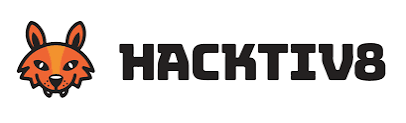

---

# Assigment 2
Tugas ini menggunakan dataset "New York City Property Sales" yang diperoleh melalui kaggle.
Kumpulan data ini adalah catatan setiap bangunan atau unit bangunan (apartemen, dll.) yang terjual di pasar properti New York City selama periode 12 bulan. Properti yang dijual di New York City selama periode 12 bulan dari September 2016 hingga September 2017.

## Data
Dataset ini berisi tentang lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi tentang bidang yang lebih rumit:

- BOROUGH: Kode digit untuk wilayah tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
- BLOCK; LOT: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut a BBL.
- BUILDING CLASS AT PRESENT dan BUILDING CLASS AT TIME OF SALE: Jenis bangunan pada berbagai titik waktu. Lihat glosarium yang ditautkan ke bawah.

Perhatikan bahwa karena ini adalah kumpulan data transaksi keuangan, ada beberapa hal yang perlu diingat:

- Banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling umum. Penjualan ini sebenarnya adalah transfer akta antar pihak: misalnya, orang tua mentransfer kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun.
- Dataset ini menggunakan definisi keuangan dari sebuah bangunan/unit bangunan, untuk tujuan perpajakan. Dalam hal satu entitas memiliki bangunan yang bersangkutan, penjualan mencakup nilai seluruh bangunan. Dalam hal sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

## Import Library
Import semua library yang dibutuhkan sebagai berikut:

In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

## Data Loading

### Import Dataset

In [42]:
# Dilakukan load dataset menggunakan pandas
data = pd.read_csv(r"~/datasets/nyc-rolling-sales.csv")
pd.set_option("display.max.columns", None)

In [43]:
# Akan dilihat 5 baris teratas dari dataset menggunakan fungsi head()
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [44]:
# menggunakan metode info() untuk mendapatkan informasi dasar tentang kerangka data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [45]:
# menggunakan parameter .columns.values untuk mendapatkan list header kolom
data.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [46]:
# Menggunakan parameter .index untuk mendapatkan daftar indeks
data.index.values

array([    0,     1,     2, ..., 84545, 84546, 84547], dtype=int64)

In [47]:
# Menggunakan parameter .shape untuk mengetahui jumlah baris dan kolom pada dataset
data.shape

(84548, 22)

In [48]:
# Menghitung jumlah nilai unik pada setiap kolom
data.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

### Missing Values

In [49]:
#Menghapus kolom yang tidak digunakan
data.drop(['Unnamed: 0','BLOCK','LOT','TAX CLASS AT PRESENT','EASE-MENT','APARTMENT NUMBER','ADDRESS','ZIP CODE','TAX CLASS AT TIME OF SALE','SALE DATE'], axis=1, inplace=True)

In [50]:
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633,6440,1900,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,28,3,31,4616,18690,1900,C7,-
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,16,1,17,2212,7803,1900,C7,-
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272,6794,1913,C4,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369,4615,1900,C2,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2400,2575,1998,B9,450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2498,2377,1998,B9,550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,B2,2,0,2,4000,1496,1925,B2,460000
84546,5,WOODROW,22 STORE BUILDINGS,K6,0,7,7,208033,64117,2001,K6,11693337


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   BUILDING CLASS AT PRESENT       84548 non-null  object
 4   RESIDENTIAL UNITS               84548 non-null  int64 
 5   COMMERCIAL UNITS                84548 non-null  int64 
 6   TOTAL UNITS                     84548 non-null  int64 
 7   LAND SQUARE FEET                84548 non-null  object
 8   GROSS SQUARE FEET               84548 non-null  object
 9   YEAR BUILT                      84548 non-null  int64 
 10  BUILDING CLASS AT TIME OF SALE  84548 non-null  object
 11  SALE PRICE                      84548 non-null  object
dtypes: int64(5), object(7)
memory usage: 7.7+ MB


In [52]:
#Mengecek missing values
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

Dilihat dari pengecekan missing value diatas terlihat bahwa tidak terdapat missing value dari data tersebut, tetapi jika dilihat dari datasets tersebut terdapat data yang memiliki nilai "-". Maka dilakukanya pengubahan bentuk data dan ada 12 atribut yang akan digunakan.

In [53]:
# Mengubah bentuk data menjadi numerik
num = ['LAND SQUARE FEET',
       'GROSS SQUARE FEET',
       'SALE PRICE'
      ]

for col in num:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633.0,6440.0,1900,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,28,3,31,4616.0,18690.0,1900,C7,NaN
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,16,1,17,2212.0,7803.0,1900,C7,NaN
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272.0,6794.0,1913,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369.0,4615.0,1900,C2,8000000.0


In [54]:
# Mengecek missing values
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
dtype: int64

In [55]:
# Menghapus missing value
data = data.dropna()

In [56]:
# Mengecek missing values setelah dilakukan penghapusan
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

In [57]:
data.shape

(48244, 12)

In [58]:
# Mengecek data duplikat
data.duplicated().sum()

3171

In [59]:
# Menghapusan data duplikat
data = data.drop_duplicates(data.columns, keep='last')

In [60]:
# Mengecek data duplikat setelah dilakukan penghapusan
data.duplicated().sum()

0

In [61]:
data.shape

(45073, 12)

In [62]:
# Melihat data setelah pembersihan
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633.0,6440.0,1900,C2,6625000.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272.0,6794.0,1913,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369.0,4615.0,1900,C2,8000000.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,8,0,8,1750.0,4226.0,1920,C4,3192840.0
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D9,24,0,24,4489.0,18523.0,1920,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2400.0,2575.0,1998,B9,450000.0
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2498.0,2377.0,1998,B9,550000.0
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,B2,2,0,2,4000.0,1496.0,1925,B2,460000.0
84546,5,WOODROW,22 STORE BUILDINGS,K6,0,7,7,208033.0,64117.0,2001,K6,11693337.0


#### Interpretasi:
Setelah dilakukan pembersihan data, data yang awalnya berjumlah 84548 dengan kolom 22 sekarang menjadi 45073 dengan kolom 12.

In [63]:
# Mengubah kolom borough sesuai dengan keterangan pada dataset
data['BOROUGH'] = data['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633.0,6440.0,1900,C2,6625000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272.0,6794.0,1913,C4,3936272.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369.0,4615.0,1900,C2,8000000.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,8,0,8,1750.0,4226.0,1920,C4,3192840.0
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D9,24,0,24,4489.0,18523.0,1920,D9,16232000.0


In [64]:
# Membuat dataframe baru : data_copy
data_copy = data.copy()

### Measure of Central Tedency: Mean

Berapa rata-rata harga penjualan properti di Newyork?

In [65]:
mean = np.mean(data_copy['SALE PRICE'])
mean

1218962.575710514

Didapat nilai rata-rata harga penjualan di Newyork sebesar \\$1218962.575710514

### Measure of Central Tedency: Median

Berapa nilai tengah pada tahun pembuatan properti di Newyork?

In [66]:
median = np.median(data_copy["YEAR BUILT"])
median

1930.0

Didapat nilai tengah pada tahun pembuatan properti adalah pada tahun 1930.

### Measure of Central Tedency: Mode

Wilayah apa yang paling sering banyak terjual di pasar properti Newyork?

In [68]:
modus = scipy.stats.mode(data_copy["BOROUGH"])
modus

ModeResult(mode=array(['Brooklyn'], dtype=object), count=array([21599]))

Wilayah yang paling banyak terjual pada pasar properti Newyork adalah Brooklyn.

### Measure of Spread: Range

Berapa jarak tanah pada properti di Newyork?

In [70]:
jarak = np.ptp(data_copy["LAND SQUARE FEET"])
jarak

4228300.0

Didapat jarak pada tanah pada properti di Neywork adalah 4228300.0 meter persegi.

### Measure of Spread: Variance

Berapa varian dari harga penjualan properti di Newyork?

In [71]:
varian = np.var(data_copy["SALE PRICE"], ddof=1)
varian

191944209261337.6

Didapat varian harga penjualan properti di Neywork sebesar 191944209261337.6

### Measure of Spread: Standard Deviation

Berapa standar deviasi pada harga penjualan properti di Newyork?

In [72]:
sd = np.std(data_copy["SALE PRICE"], ddof=1)
sd

13854393.139410242

Didapat nilai standar deviasi dari harga penjualan properti di Newyork sebesar 13854393.139410242

### Probability Distribution

Melihat distribusi data Land Square Feet 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


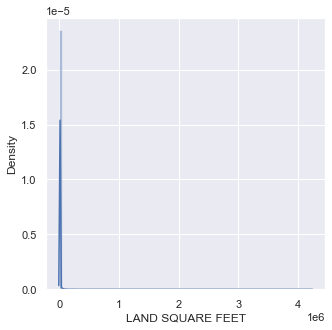

Penyebaran Data Land Square Feet:

Range:  4228300.0
Variance:  988487069.0328388
Standar Deviation:  31440.21420144651
Skewness:  91.58478921082367
Kurtosis: 10155.98107189324


In [75]:
var_lsf = np.var(data_copy["LAND SQUARE FEET"], ddof=1)
sd_lsf = np.std(data_copy["LAND SQUARE FEET"], ddof=1)
skew_lsf = scipy.stats.skew(data_copy["LAND SQUARE FEET"], bias=False)

lsf = data_copy["LAND SQUARE FEET"]
np.var(lsf)

sns.distplot(lsf, kde=True, bins=100)
plt.show()

print("Penyebaran Data Land Square Feet:\n")
print('Range: ', jarak)
print('Variance: ', var_lsf)
print('Standar Deviation: ', sd_lsf)
print('Skewness: ', skew_lsf)
print('Kurtosis:', lsf.kurt())

Dilihat dari hasil di atas, range dari data Land Square Feet sebesar 4228300 meter persegi. Untuk varian dari data ini sebesar 988487069.0328388 dimana dikatakan bahwa data ini sangat bervariasi dan nilai standar deviasi sebesar 31440.21420144651

### Confidence Intervals

Mencari nilai selang kepercayaan dari data Sale Price berdasarkan wilayah Brooklyn.

In [78]:
# Mencari mean, standar deviasi, dan size dari 'SALE PRICE'
data_ci = data_copy.groupby('BOROUGH').agg({'SALE PRICE':[np.mean, np.std, np.size]})

In [80]:
# Mencari nilai mean pada Brooklyn
mean = data_ci.loc['Brooklyn']['SALE PRICE']['mean']
# Mencari nilai standar deviasi pada Brooklyn
sd = data_ci.loc['Brooklyn']['SALE PRICE']['std']
# Mencari nilai size pada Brooklyn
n = data_ci.loc['Brooklyn']['SALE PRICE']['size'] 
z = 1.96 #tingkat kepercayaan sebesar 95%

# Mencari standar error
se = sd / np.sqrt(n)

# Mencari selang kepercayaan
lcb = mean - z * se
ucb = mean + z * se
lcb,ucb

(853607.7652064956, 964120.7658366082)

Berdasarkan hasil di atas didapat nilai selang kepercayaan dari harga properti pada wilayah Brooklyn berada pada interval \\$853607.7652064956 - \\$964120.7658366082

### Hypothesis Testing

Melihat apakah data Sale Price berdistribusi normal menggunakan uji Shapiro-Wilk Test.

H0 : Sale Price berdistribusi normal\
H1 : Sale Price tidak berdistribusi normal

In [83]:
from scipy.stats import shapiro
data1 = data_copy['SALE PRICE']
stat, p = shapiro(data1)
print('stat=%3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.028018, p=0.000
Probably not Gaussian


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Berdasarkan hasil uji normalitas menggunakan Shapiro-Wilk Test didapat bahwa nilai p-value = 0.000 < alpha = 0.05 yang berati tidak terima H0.\
Maka Sale Price tidak berdistribusi normal.

### Hypothesis Testing

Melihat apakah terdapat hubungan antara Sale Price dan Land Square Feet menggunakan uji Kendall's Rank.

H0 : Tidak terdapat hubungan antara Sale Price dan Land Square Feet\
H1 : Terdapat hubungan antara Sale Price dan Land Square Feet

In [84]:
from scipy.stats import kendalltau
data1 = data_copy['SALE PRICE']
data2 = data_copy['LAND SQUARE FEET']
stat, p = kendalltau(data1, data2)
print('stat=%3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')

stat=0.066828, p=0.000
Probably Dependent


Berdasarkan hasil uji korelasi menggunakan Kendall's Rank Correlation didapat bahwa nilai p-value = 0.000 < alpha = 0.05 yang berati tidak terima H0.\
Maka terdapat hubungan antara Sale Price dan Land Square Feet.

## Kesimpulan

Didapat kesimpulan sebagai berikut:
- Data yang digunakan dalam analisis ini setelah melalui preprocessing sebanyak 45073
- Nilai rata-rata harga penjualan di Newyork sebesar \\$1218962.575710514
- Nilai tengah pada tahun pembuatan properti di Newyork adalah pada tahun 1930.
- Wilayah yang paling banyak terjual pada pasar properti Newyork adalah Brooklyn.
- Jarak pada tanah pada properti di Neywork adalah 4228300.0 meter persegi.
- Varian harga penjualan properti di Neywork sebesar 191944209261337.6
- Nilai standar deviasi dari harga penjualan properti di Newyork sebesar 13854393.139410242
- Range dari data Land Square Feet sebesar 4228300 meter persegi. Untuk varian dari data ini sebesar 988487069.0328388 dimana dikatakan bahwa data ini sangat bervariasi dan nilai standar deviasi sebesar 31440.21420144651
- Nilai selang kepercayaan dari harga properti pada wilayah Brooklyn berada pada interval \\$853607.7652064956 - \\$964120.7658366082
- Berdasarkan hasil uji normalitas menggunakan Shapiro-Wilk Test didapat bahwa Sale Price tidak berdistribusi normal.
- Berdasarkan hasil uji korelasi menggunakan Kendall's Rank Correlation didapat bahwa terdapat hubungan antara Sale Price dan Land Square Feet.